# **Aprendizado não Supervisionado: Agrupamento Hierárquico**
Sílvia Moraes
---

Exemplo 1: Neste exemplo, a aplicação de agrupamento hierárquico aglomerativo é feita sobre uma **lista de pontos**. Usamos o pacote Agglomerative Clustering do sklearn na implementação.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

Criamos uma lista de pontos, cuja construção é ilustrada abaixo.

In [ ]:
# Usando pontos como exemplo
#x1 = [1,2,3,4,5,6,7]
#x2 = [1,1,4,6,3,4,3]

# Se quiser ver como mais pontos, retire os comentários das linhas a seguir
x1 = [3, 3, -5, -6, -5, 3, 4, 3, 5, -6, 4, 5, -4, -4, 5, -4, 5, 3, 2, 2, 3]
x2 = [3, 4, -5,  4,  4,-5, 4,-5,-6, -4, 5, 6,  6,  7,-3,  4, -5,6, 7,-5, 6]


X = []
for i in range(0,len(x1)):
  X.append([x1[i],x2[i]])
print("Lista de pontos:\n", X , "\n")

Lista de pontos:
 [[3, 3], [3, 4], [-5, -5], [-6, 4], [-5, 4], [3, -5], [4, 4], [3, -5], [5, -6], [-6, -4], [4, 5], [5, 6], [-4, 6], [-4, 7], [5, -3], [-4, 4], [5, -5], [3, 6], [2, 7], [2, -5], [3, 6]] 



**Agglomerative Clustering**

O algoritmo possui vários parâmetros. Segue aqui alguns que usamos:

*   **n_clusters** : serve para determinar quantos clusters você gostaria. Após alguns testes e visualização do dendograma, você pode estabelecer a quantidade de clusters desejada. O valor default desse parâmetro é 2.

*  **metric** : métrica usada para medir a similaridade (distância) dos clusters ao longo do processo aglomerativo. Pode ser: “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed” (neste caso, é necessário informar na entrada a matriz de distâncias/adjacências já calculada). Se for configurado como None, a métrica padrão é “euclidean”.
*   **linkage**: define o algoritmo aglomerativo que será usado como critério para realizar o merge dos dois clusters próximos. Na prática, o algoritmo determina que pontos de cada um dos clusters sob avaliação serão considerados pela métrica que estabelece similaridade. E ainda, ao confirmar proximidade, o algoritmo realiza a união dos mesmos. Pode ser:"ward", "complete", "average", "single". "ward" é o default.

1.   *ward* : minimiza a variância dos clusters que estão sendo unidos. Só aceita "euclidean" como métrica de distância.
2.   *average* : usa a média das distâncias de cada elemento de um cluster em relação ao outro.
1.   *complete* ou *maximum *: usa a maior distância, ao computar a distância de cada elemento de um cluster em relação ao outro.
2.   *single* ou *minimum* : usa a menor distância, ao computar a distância de cada elemento de um cluster em relação ao outro.

Cluster dos dados:  [1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1]
Numero de clusters:  2


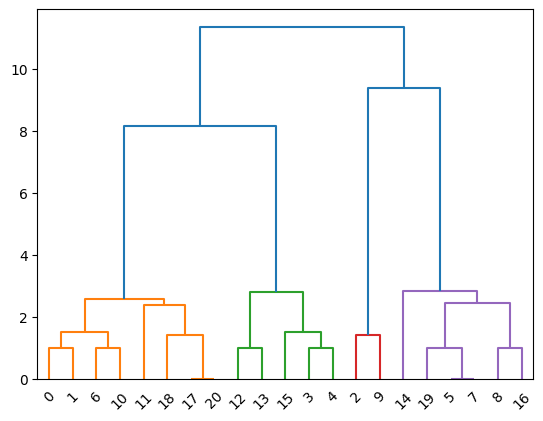

In [ ]:
#---------------------------------------------------------------------------------------
#Fizemos vários testes de configuração desse algoritmo.
#Para testar, retire os comentários apenas da configuração que você quer estudar.
#Plotamos um dendograma para você conseguir visualizar o resultado
#---------------------------------------------------------------------------------------

#Exemplo 1
#dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
#model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

#Exemplo 2
#dendrogram = sch.dendrogram(sch.linkage(X, method='single'))
#model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='single')

#Exemplo 3
#dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))
#model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='complete')

#Exemplo 4
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))
model = AgglomerativeClustering(metric='euclidean', linkage='average')

model.fit(X)
labels = model.labels_
numCluster = model.n_clusters
print("Cluster dos dados: ", labels)
print("Numero de clusters: ", numCluster)


Trecho a seguir que mostra como os dados foram agrupados. Usamos os labels atribuidos pelo algoritmo para mostrar a organização realizada pelo algoritmo.

In [ ]:
for iCluster in range(0,numCluster):
  print("Cluster: ", iCluster)
  for indice in range(0, len(labels)):
    if labels[indice]==iCluster: print(X[indice])

plt.show()

Cluster:  0
[-5, -5]
[3, -5]
[3, -5]
[5, -6]
[-6, -4]
[5, -3]
[5, -5]
[2, -5]
Cluster:  1
[3, 3]
[3, 4]
[-6, 4]
[-5, 4]
[4, 4]
[4, 5]
[5, 6]
[-4, 6]
[-4, 7]
[-4, 4]
[3, 6]
[2, 7]
[3, 6]
